# Artificial Intelligence (CS6364-002) 
## Homework 2 - Question 4
## Submission by - Adithya Sundararajan Iyer (asi200000)


(Logistic Regression): Write python codes in a Jupyter notebook that implement the gradient descent algorithm to train a logistic regression model for the Titantic dataset

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import pandas as pd  
import seaborn as sns 

In [2]:
titanicTrain = pd.read_csv('titanic_train.csv')

To have a look at the dataset loaded, we look at its keys

In [3]:
datasetKeys = titanicTrain.keys()
print(datasetKeys)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


Now we need to read peak at the top values of the training dataset

In [4]:
titanicTrain.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Data visualization

Pre-processing step

In [5]:
titanicTrain.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Since there are null/void/na values in the dataset, we could either replace them with appropriate values or clear the rows

We could use imputation to replace the empty values for 'age' by their Passenger class (Pclass) attribute

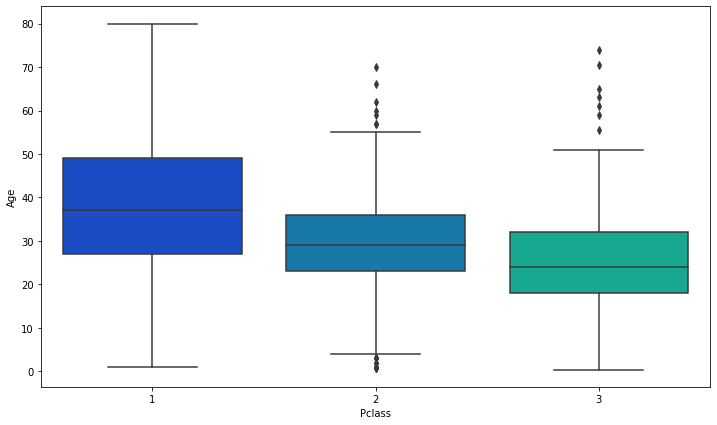

In [6]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=titanicTrain,palette='winter')

In [7]:
def imputation(cols):
  Age, Pclass = cols[0], cols[1]
  if pd.isnull(Age):
    if Pclass==1:
      return 38
    elif Pclass==2:
      return 29
    else:
      return 25
  else:
    return Age

titanicTrain['Age'] = titanicTrain[['Age','Pclass']].apply(imputation,axis=1)

In [8]:
titanicTrain.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
titanicTrain.drop('Cabin',axis=1,inplace=True)
titanicTrain.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [10]:
titanicTrain.dropna(inplace=True)
titanicTrain.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [11]:
titanicTrain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [12]:
sexTrain = pd.get_dummies(titanicTrain['Sex'],drop_first=True)
sexTrain.head()

,male
0,1
1,0
2,0
3,0
4,1


In [13]:
embarkedTrain = pd.get_dummies(titanicTrain['Embarked'],drop_first=True)
embarkedTrain.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [14]:
titanicTrain.drop(['Sex','Embarked','Name','Ticket','PassengerId'],axis=1,inplace=True)
titanicTrain = pd.concat([titanicTrain,sexTrain,embarkedTrain],axis=1)
titanicTrain.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [15]:
titanicTrain.keys()

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male', 'Q',
       'S'],
      dtype='object')

Split the dataset to a training set (80% samples) and a testing set (20% samples)

In [17]:
from sklearn.model_selection import train_test_split

xData = titanicTrain.drop('Survived',axis=1)
yData = titanicTrain['Survived']

xTrain, xTest, yTrain, yTest = train_test_split(xData, yData, test_size=0.2, random_state=42)
print(xTrain.shape, xTest.shape)
print(yTrain.shape, yTest.shape)
xTrain = xTrain.to_numpy()
xTest = xTest.to_numpy()
yTrain = yTrain.to_numpy()
yTest = yTest.to_numpy()

(711, 8) (178, 8)
(711,) (178,)


Now we implement the gradient descent algorithm to train the logistic regression model 

In [20]:
from scipy.special import expit

def gradients(x, y, bias, wts):

  r, c = x.shape
  db = 0.0
  dw = np.zeros((c,))

  for i in range(r):
    h = expit(np.dot(x[i],wts)+bias)
    ydiff = h - y[i]
    db += ydiff
    for j in range(c):
      dw[j] += ydiff*x[i,j]
  db /= r
  dw /= r

  return db, dw


In [21]:
def gradDesc(xTrain, yTrain, eta, epochs):
  bias = 1.0
  wts = np.zeros_like(xTrain[0])
  for ep in range(epochs):
    db, dw = gradients(xTrain, yTrain, bias, wts)
    bias -= eta*db
    wts -= eta*dw
  return bias, wts

bias, wts = gradDesc(xTrain, yTrain, 0.05, 1000)
print('Trained bias and weights:', bias, wts)

Trained bias and weights: 1.474243996892792 [-6.18019650e-01 -1.17325508e-03 -3.50630108e+00 -8.55933205e-01
  7.12874691e-01 -4.19114924e+00  3.86854640e-01 -7.26158282e-01]


Now we will use our trained weights against the training dataset and also to make predictions with the test dataset

In [22]:
yTrainList = []
trainPredList = []
for j in range(xTrain.shape[0]):
  yTrainList.append(yTrain[j])
  trainPred = int(expit(np.dot(xTrain[j],wts)+bias))
  trainPredList.append(trainPred)

yTestList = []
testPredList = []
for j in range(xTest.shape[0]):
  yTestList.append(yTest[j])
  testPred = int(expit(np.dot(xTest[j],wts)+bias))
  testPredList.append(testPred)

Finally we determine the accuracy of our trained Logistic Regressor by evaluating the Classification Report for Training and the Testing dataset.

In [24]:
from sklearn import metrics
from sklearn.metrics import classification_report

print('----------------Training Dataset Evaluation Metrics----------------')
print(classification_report(yTrainList,trainPredList))
print("Training Accuracy:", metrics.accuracy_score(yTrainList,trainPredList))

print('\n')

print('----------------Testing Dataset Evaluation Metrics----------------')
print(classification_report(yTestList,testPredList))
print("Training Accuracy:", metrics.accuracy_score(yTestList,testPredList))

----------------Training Dataset Evaluation Metrics----------------
              precision    recall  f1-score   support

           0       0.67      0.94      0.78       440
           1       0.72      0.25      0.37       271

    accuracy                           0.68       711
   macro avg       0.70      0.60      0.58       711
weighted avg       0.69      0.68      0.63       711

Training Accuracy: 0.6779184247538678


----------------Testing Dataset Evaluation Metrics----------------
              precision    recall  f1-score   support

           0       0.67      0.94      0.79       109
           1       0.76      0.28      0.40        69

    accuracy                           0.69       178
   macro avg       0.72      0.61      0.60       178
weighted avg       0.71      0.69      0.64       178

Training Accuracy: 0.6853932584269663
